In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19s-impact-on-airport-traffic/covid_impact_on_airport_traffic.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Getting and Knowing Data

In [3]:
data = pd.read_csv(r'/kaggle/input/covid19s-impact-on-airport-traffic/covid_impact_on_airport_traffic.csv')

In [4]:
data.head(2)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [5]:
data.tail(2)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7246,Daily,2020-08-30,1.0,Seattle-Tacoma International,68,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [6]:
data.shape

(7247, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [8]:
data['Date'] = data['Date'].astype('datetime64[ns]')

In [9]:
data.describe(include='all')

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,262,NaN,28,NaN,28,27,23,23,4,28
top,Daily,2020-03-27 00:00:00,NaN,Hartsfield-Jackson Atlanta International,NaN,POINT(-73.7784465295804 40.6460265940045),New York,California,US-NY,United States of America (the),"POLYGON((-73.751757144928 45.44954912446, -73...."
freq,7247,28,NaN,262,NaN,262,523,523,523,4441,262
first,NaN,2020-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN


There are 4 countries, 23 states,27 cities and 28 airports in the dataset. Data has been collected for 262 distinct days starting from 16/03/20 to 02/12/20.

Centroid and Country are POINT and POLYGON structures, telling us that they are geographical locations.

Also, from count we can see, that all features have no missing value.

In [10]:
data.duplicated().sum() #No duplicates are present.

0

## Removing features that aren't important

The geography is a polygon feature meaning it resembles shape. So, we can conclude that geography tells us the shape of an airport. Since, we don't require it for our analysis. We'll drop it.

Same reasoning applies for centroid. Centroid probably tells us the latitude and longitude of the centre of the airport. Since, we don't have any use for that. We'll drop it too.

ISO_3166_2 is some unique value for every state. We won't be requiring it for time series analysis.

AggregationMethod is always 'Daily', so, it doesn't provide any information. We can remove it.

No information on version is provided. So, we'll leave that from our analysis.

In [11]:
data = data.drop(columns = ['AggregationMethod','Version','Centroid','ISO_3166_2','Geography'])

In [12]:
data.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia


# Univariate Analysis

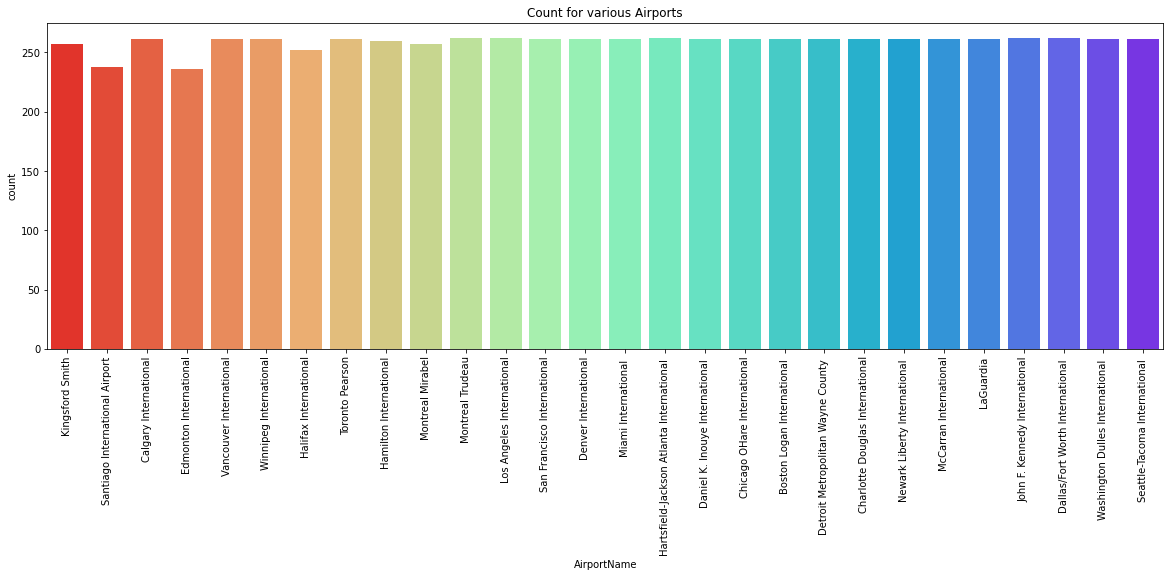

In [13]:
plt.figure(figsize=(20,6))
fig1 = sns.countplot(x = 'AirportName', data = data , palette='rainbow_r')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)
fig1.set_title("Count for various Airports")
plt.show();
# This shows that there are around 250 data points on each airport except Santiago International Airport and Edmonton International

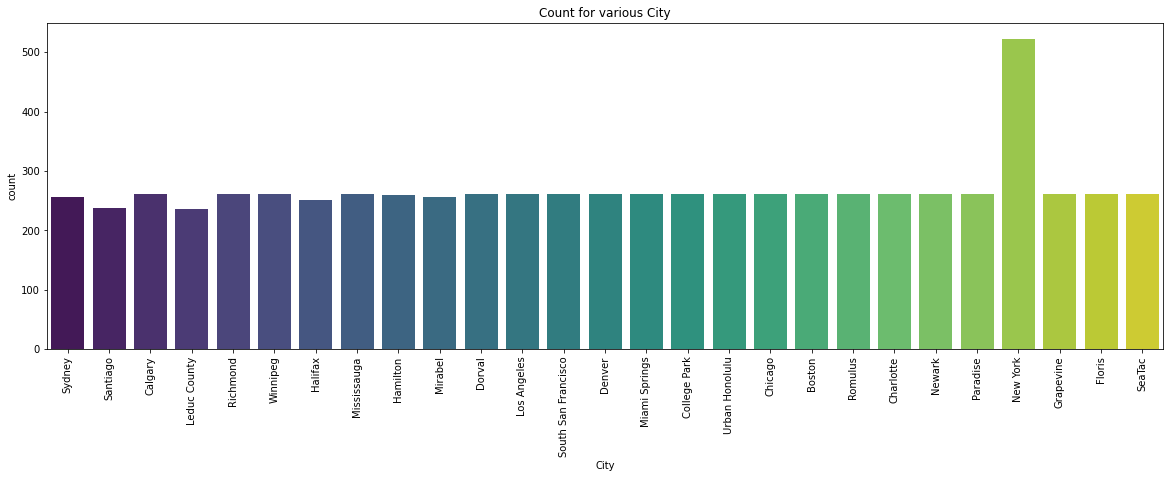

In [14]:
plt.figure(figsize=(20,6))
fig2 = sns.countplot(x = 'City', data = data , palette='viridis')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)
fig2.set_title("Count for various City")
plt.show();
# This shows that all cities have more or less equal counts in data except New York. The most likely reason would be that it has more airports.

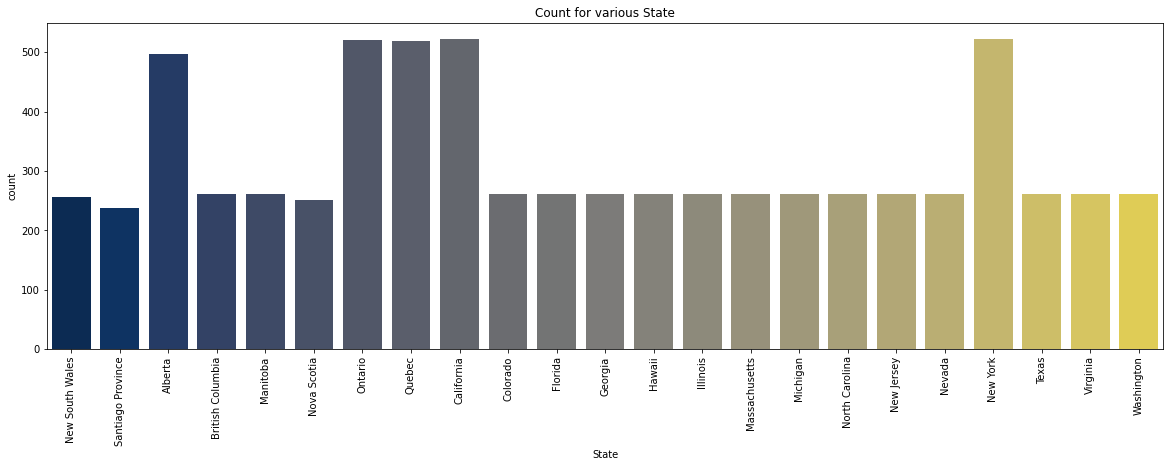

In [15]:
plt.figure(figsize=(20,6))
fig3 = sns.countplot(x = 'State', data = data , palette='cividis')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=90)
fig3.set_title("Count for various State")
plt.show();
# Here, all states have equal counts in data except Alberta,Quebec,California and New York. Again most likely reason must be the number of airports. We'll come again on this in in-depth analysis of countries.

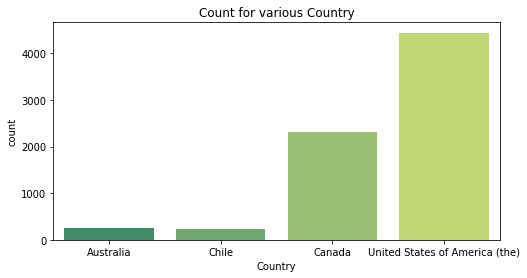

In [16]:
plt.figure(figsize=(8,4))
fig4 = sns.countplot(x = 'Country', data = data , palette='summer')
fig4.set_xticklabels(fig4.get_xticklabels())
fig4.set_title("Count for various Country")
plt.show();
# Maximum data points are for US followed by Canada. This is because the number of airports in US and Canada are probably more than Australia and Chile.

In [17]:
data.groupby("Country")[['State','City','AirportName']].nunique()

,State,City,AirportName
Country,,,
Australia,1,1,1
Canada,6,9,9
Chile,1,1,1
United States of America (the),15,16,17


## Distribution of PercentOfBaseline

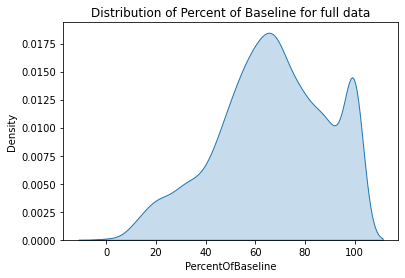

In [18]:
sns.kdeplot(data['PercentOfBaseline'],shade=True)
plt.title("Distribution of Percent of Baseline for full data")
plt.show();

# Bivariate Analysis

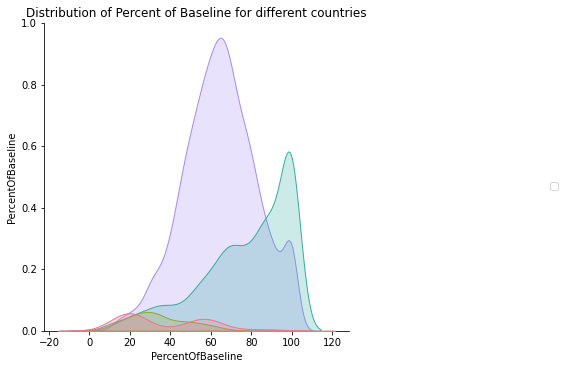

In [19]:
fig5 = sns.pairplot(data,hue='Country',height=5,palette='husl',aspect=1)
fig5._legend.remove()
plt.title("Distribution of Percent of Baseline for different countries")
plt.legend(loc = 'upper right',bbox_to_anchor=(1.2, 0., 0.5, 0.5))
plt.show();

# Analysis For CHILE

In [20]:
data_chile = data[data['Country']=='Chile']

In [21]:
data_chile.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
257,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,Chile
258,2020-04-28,Santiago International Airport,21,Santiago,Santiago Province,Chile
259,2020-05-12,Santiago International Airport,35,Santiago,Santiago Province,Chile
260,2020-05-21,Santiago International Airport,13,Santiago,Santiago Province,Chile
261,2020-10-19,Santiago International Airport,55,Santiago,Santiago Province,Chile


In [22]:
data_chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 257 to 494
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               238 non-null    datetime64[ns]
 1   AirportName        238 non-null    object        
 2   PercentOfBaseline  238 non-null    int64         
 3   City               238 non-null    object        
 4   State              238 non-null    object        
 5   Country            238 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 13.0+ KB


In [23]:
data_chile.nunique()

Date                 238
AirportName            1
PercentOfBaseline     61
City                   1
State                  1
Country                1
dtype: int64

Data on Chile is based on only one state which has one city with one airport named Santiago International airport

In [24]:
data_chile = data_chile.sort_values(by="Date")

In [25]:
data_chile.set_index('Date',inplace=True)

In [26]:
data_chile.head()

,AirportName,PercentOfBaseline,City,State,Country
Date,,,,,
2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,Chile
2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,Chile
2020-03-18,Santiago International Airport,56,Santiago,Santiago Province,Chile
2020-03-19,Santiago International Airport,52,Santiago,Santiago Province,Chile
2020-03-20,Santiago International Airport,53,Santiago,Santiago Province,Chile


In [27]:
data_chile = data_chile.drop(columns=['AirportName','City','State','Country'])

In [28]:
data_chile.head()

,PercentOfBaseline
Date,
2020-03-16,96
2020-03-17,72
2020-03-18,56
2020-03-19,52
2020-03-20,53


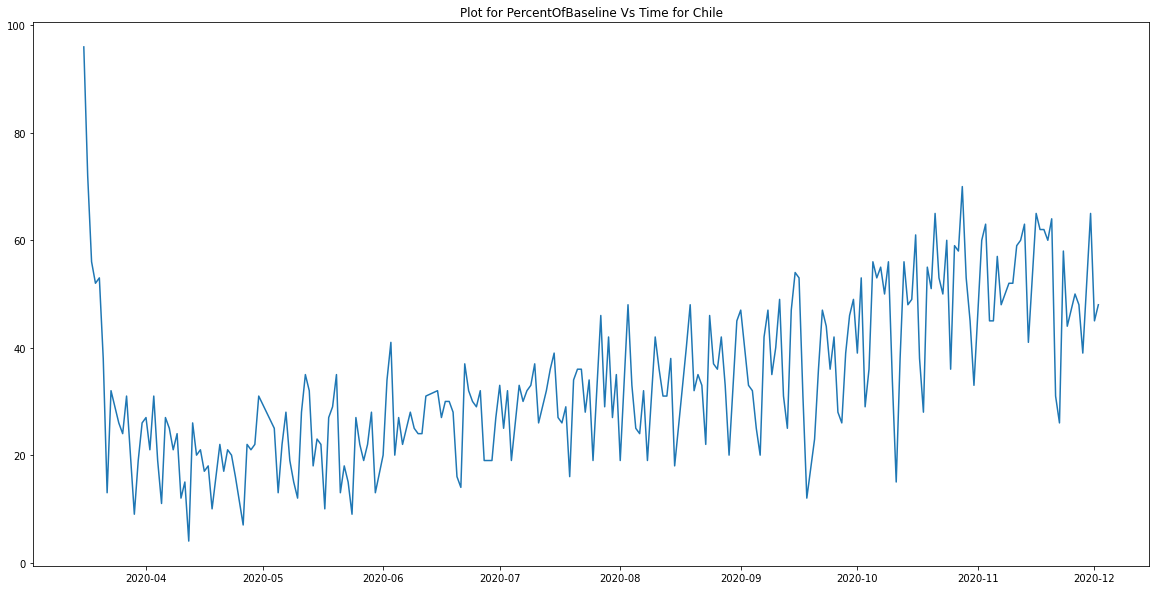

In [29]:
plt.figure(figsize=(20,10))
plt.plot(data_chile['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline Vs Time for Chile")
plt.show();

In [30]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_chile['PercentOfBaseline'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.831164
p-value                          0.809796
#Lags Used                      11.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

We can conclude that our data is not stationary, hence, we need to make it stationary because all timeseries models are stationary.

In [31]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
print ('Results of KPSS Test:')
kpsstest = kpss(data_chile['PercentOfBaseline'], regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            1.135992
p-value                   0.010000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series.

KPSS test also suggests that our series is NOT stationary.
https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

Please see this to understand the warning https://stats.stackexchange.com/questions/286124/kpss-test-in-python-with-statsmodels/286167

In [32]:
data_chile['diff'] = data_chile['PercentOfBaseline'] - data_chile['PercentOfBaseline'].shift(1)

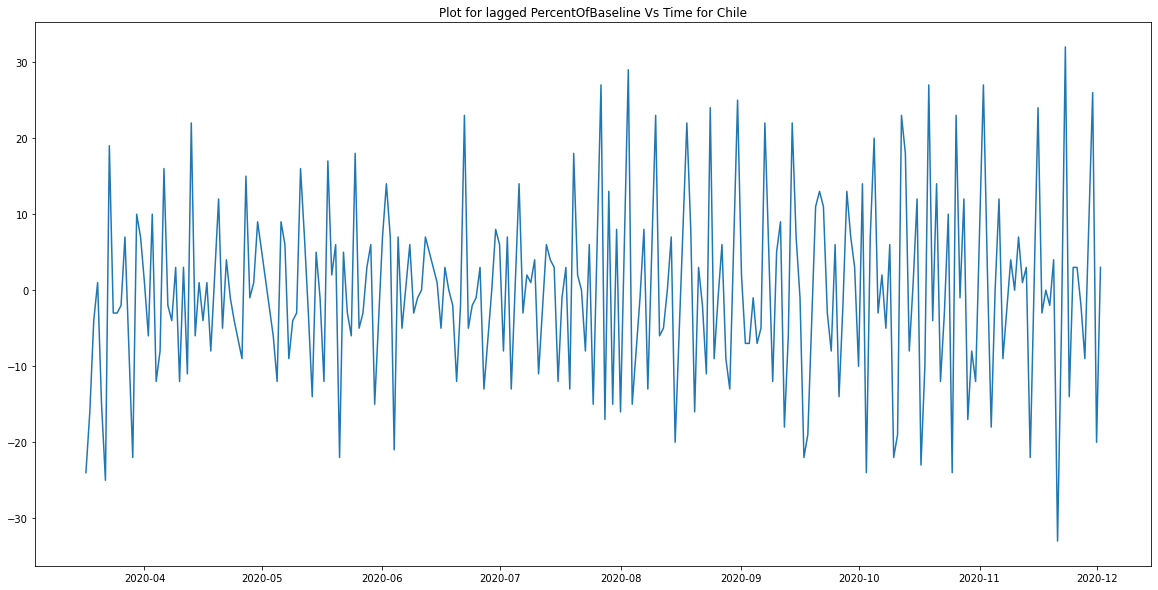

In [33]:
plt.figure(figsize=(20,10))
plt.plot(data_chile['diff'])
plt.title("Plot for lagged PercentOfBaseline Vs Time for Chile")
plt.show();


In [34]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_chile['diff'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.215954e+00
p-value                        2.172990e-10
#Lags Used                     1.200000e+01
Number of Observations Used    2.240000e+02
Critical Value (1%)           -3.459885e+00
Critical Value (5%)           -2.874531e+00
Critical Value (10%)          -2.573694e+00
dtype: float64


We reject null hypothesis and say series has become stationary now.

In [35]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
print ('Results of KPSS Test:')
kpsstest = kpss(data_chile['diff'].dropna(), regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            0.290059
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


## Now, we have made the series to be strictly stationary, so we move onto modelling. Since, there is no seasonal component, we can use ARIMA Model. Let's first find out value of p, d and q

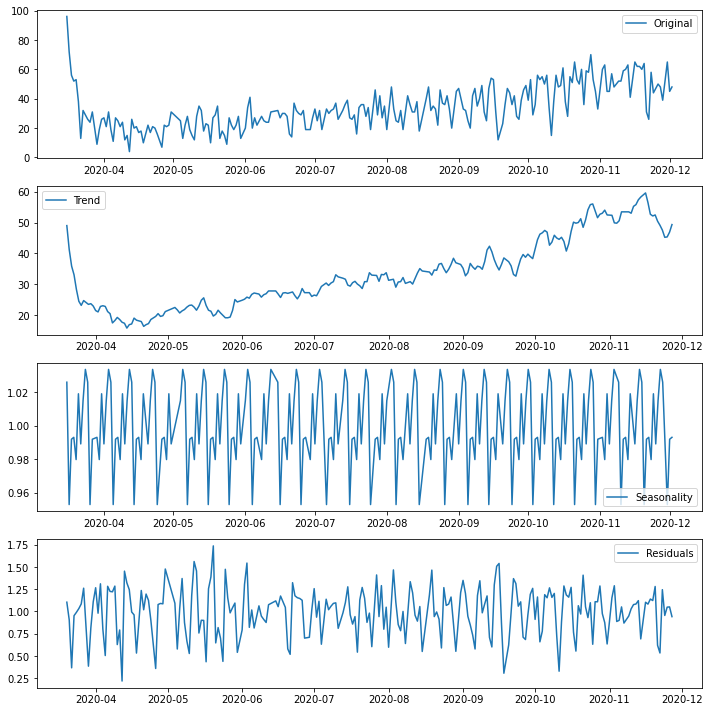

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=data_chile['PercentOfBaseline'].dropna(),model='multiplicative',period=9)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(data_chile['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

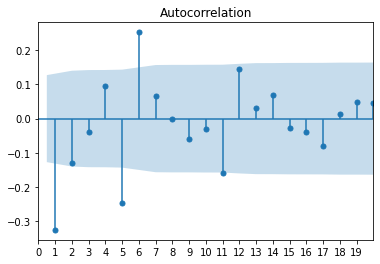

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data_chile['diff'].dropna(),zero=False)
plt.xlim(0,20)
plt.xticks(np.arange(0,20,1))
plt.show(); #q=1 or q=0

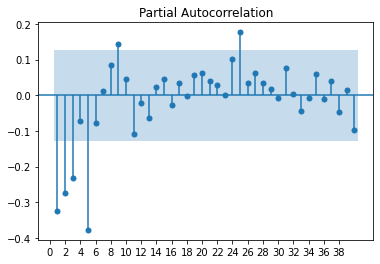

In [38]:
plot_pacf(data_chile['diff'].dropna(),zero=False,lags=40,method='ols',alpha=0.05)
plt.xticks(np.arange(0,40,2))
plt.show(); # p=3,5

In [39]:
df = pd.DataFrame(data_chile['diff'])

In [40]:
df.dropna(inplace=True)

In [41]:
from statsmodels.tsa.arima_model import ARMA

In [42]:
# Create Training and Test
train = df.iloc[:212]
test = df.iloc[212:]
# Build Model
model = ARMA(train, order=(6,0))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(25, alpha=0.05);  # 95% conf

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                  212
Model:                     ARMA(6, 0)   Log Likelihood                -781.302
Method:                       css-mle   S.D. of innovations              9.612
Date:                Wed, 23 Jun 2021   AIC                           1578.604
Time:                        12:59:17   BIC                           1605.456
Sample:                             0   HQIC                          1589.457
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0690      0.183     -0.378      0.706      -0.427       0.289
ar.L1.diff    -0.5904      0.074     -8.008      0.000      -0.735      -0.446
ar.L2.diff    -0.5764      0.079     -7.286      0.0

The warning is given letting the user know that the index is not a date/time index. It won't have any effect on predictions.

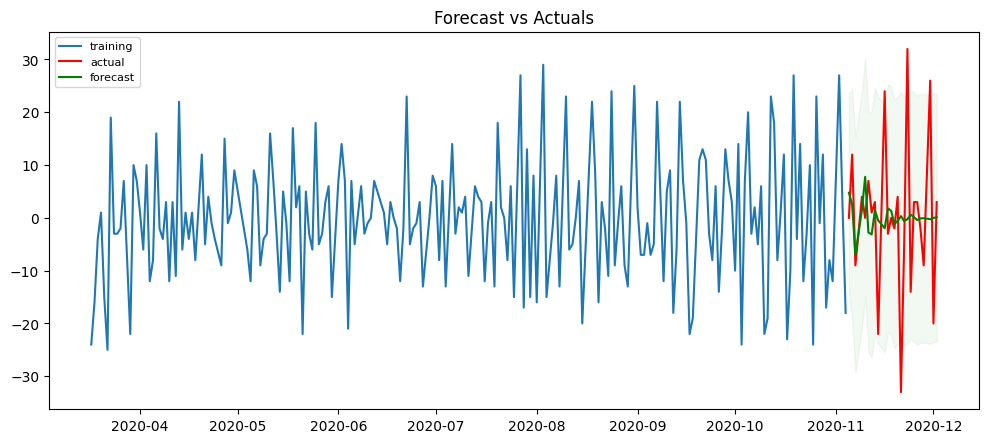

In [43]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual',color='r')
plt.plot(fc_series, label='forecast',color='g')
plt.fill_between(lower_series.index, lower_series, upper_series,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()


# Analysis for USA

In [44]:
data_US = data[data['Country']=='United States of America (the)']

In [45]:
data_US.shape

(4441, 6)

In [46]:
df1 = pd.DataFrame(data_US.groupby('Date',as_index=True)['PercentOfBaseline'].mean())

In [47]:
df1.head()

,PercentOfBaseline
Date,
2020-03-16,88.058824
2020-03-17,87.823529
2020-03-18,81.705882
2020-03-19,73.764706
2020-03-20,73.058824


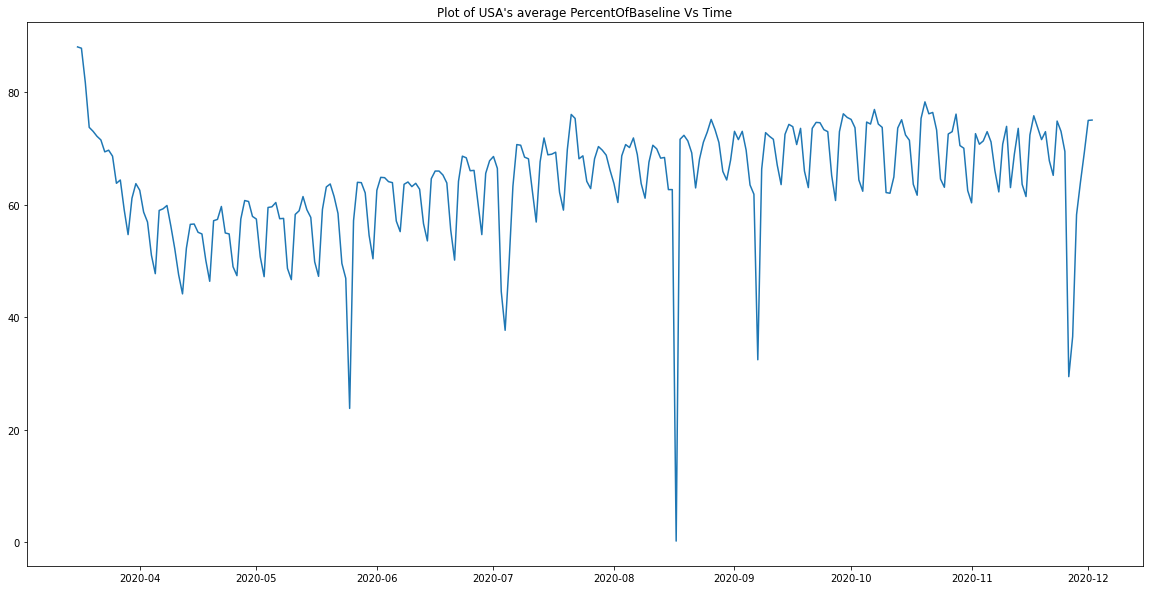

In [48]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.title("Plot of USA's average PercentOfBaseline Vs Time")
plt.show()

In [49]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1['PercentOfBaseline'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.920672
p-value                          0.042996
#Lags Used                       6.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


We accept reject hypothesis and say that series is stationary.

In [50]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
print ('Results of KPSS Test:')
kpsstest = kpss(df1['PercentOfBaseline'].dropna(), regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            0.84213
p-value                   0.01000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


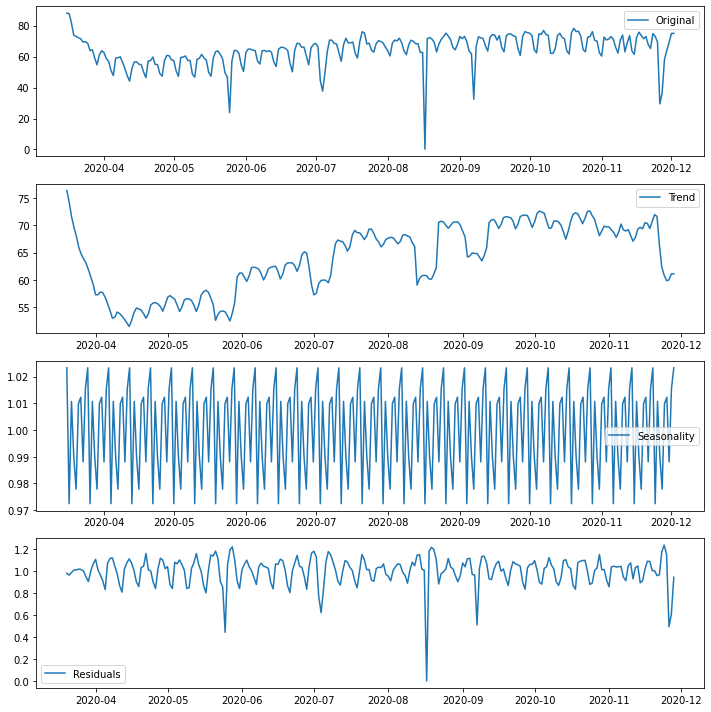

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=df1['PercentOfBaseline'],model='multiplicative',period=9)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(df1['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

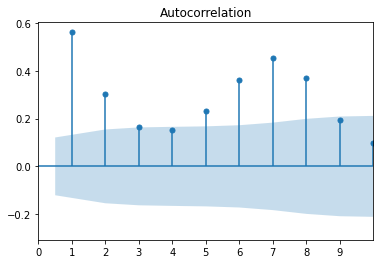

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df1['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

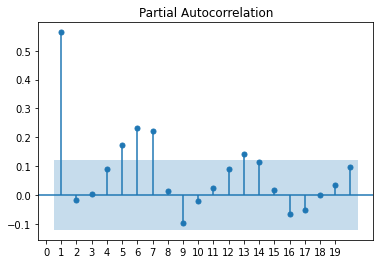

In [53]:
plot_pacf(df1['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

In [54]:
from statsmodels.tsa.arima_model import ARMA

In [55]:
# Create Training and Test
size = int(len(df1['PercentOfBaseline'])*0.8)
train = df1['PercentOfBaseline'].iloc[:size]
test = df1['PercentOfBaseline'].iloc[size:]
# Build Model
model = ARMA(train, order=(1,2))  
fitted = model.fit() 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -733.953
Method:                       css-mle   S.D. of innovations              8.092
Date:                Wed, 23 Jun 2021   AIC                           1477.906
Time:                        12:59:22   BIC                           1494.617
Sample:                    03-16-2020   HQIC                          1484.662
                         - 10-10-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      65.3295      3.677     17.765      0.000      58.122      72.537
ar.L1.PercentOfBaseline     0.9723      0.023     42.441      0.000       0.927       1.017


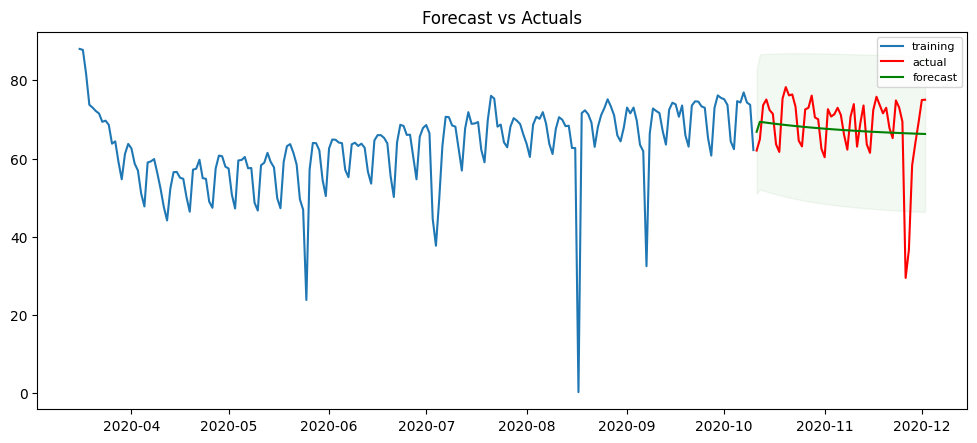

In [56]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual',color='r')
plt.plot(fc_series, label='forecast',color='g')
plt.fill_between(lower_series.index, lower_series, upper_series,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

# Hope you all liked it!
# I'd appreciate if you'll leave comments below for any suggestions.